In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading Data

In [6]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
df.shape

(396030, 27)

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## Expolatory Data Analysis

In [10]:
feat_info('loan_status')

Current status of the loan


In [11]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

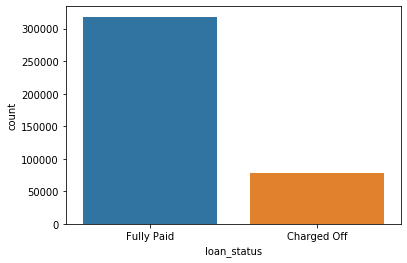

In [12]:
sns.countplot(x='loan_status', data=df )

### Handling Missing Values

In [13]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [14]:
feat_info('mort_acc')

Number of mortgage accounts.


In [15]:
df['mort_acc'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [16]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [17]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

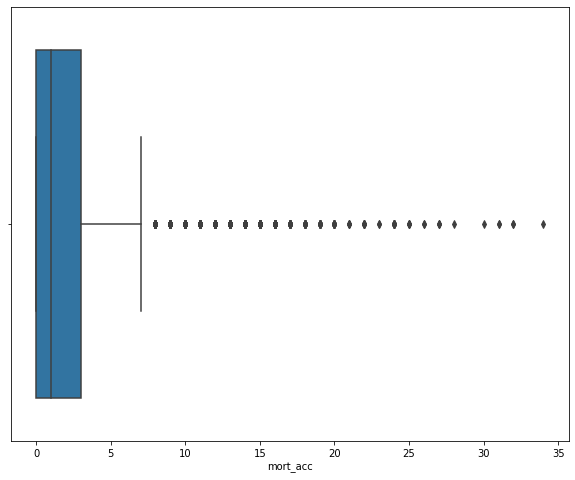

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='mort_acc', data=df)

In [19]:
df['mort_acc'].mean()

1.8139908160844138

In [20]:
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean())

In [21]:
df.isna().sum().sort_values(ascending=False)

emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
issue_d                     0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
loan_amnt                   0
dtype: int64

In [22]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [23]:
df['emp_title'].describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [24]:
df['emp_title'].head()

0                  Marketing
1            Credit analyst 
2               Statistician
3            Client Advocate
4    Destiny Management Inc.
Name: emp_title, dtype: object

In [25]:
df['emp_length'].head()

0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object

In [26]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [27]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [28]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### loan_amnt

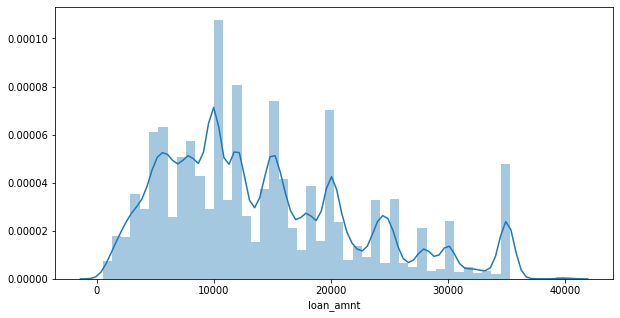

In [29]:
plt.figure(figsize=(10, 5))
sns.distplot(df['loan_amnt'])

### Corelation

In [30]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.212167,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.079115,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.185117,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.223975,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025211,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.104541,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011414,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.189428,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007013,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.362796,0.042035


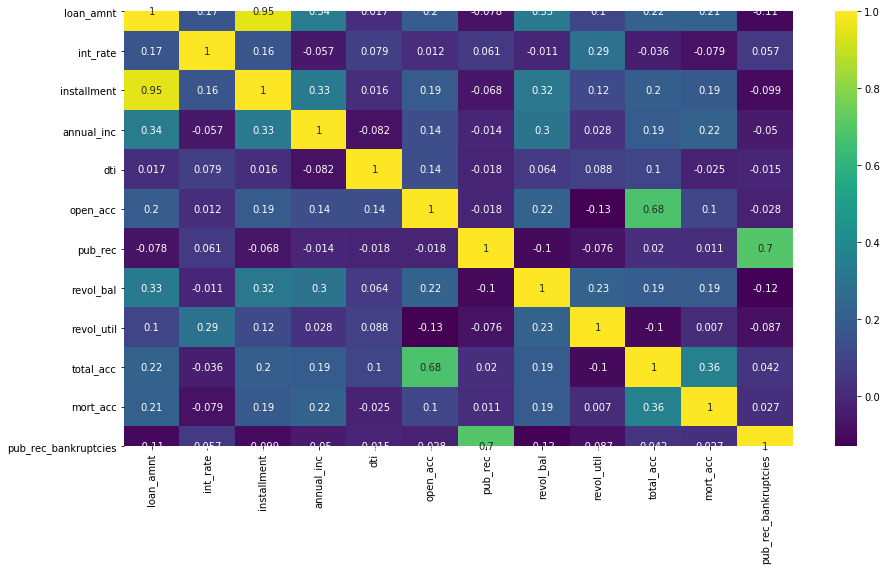

In [31]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### installment

<Figure size 720x360 with 0 Axes>

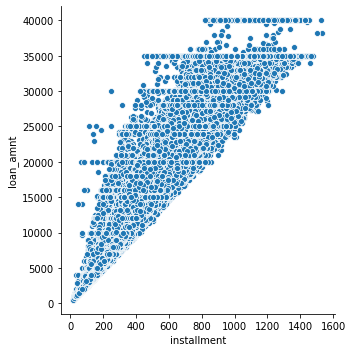

In [32]:
plt.figure(figsize = (10, 5))
sns.relplot(x='installment', y='loan_amnt', data=df)

### Grades

In [33]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

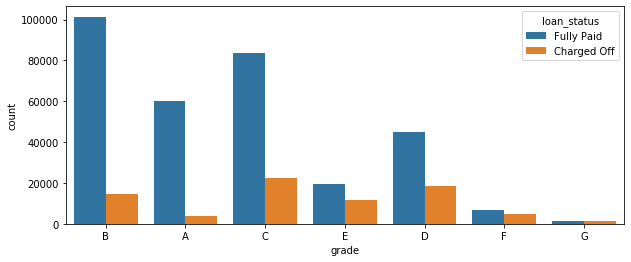

In [34]:
plt.figure(figsize = (10, 4))
sns.countplot(x='grade', data=df, hue='loan_status')

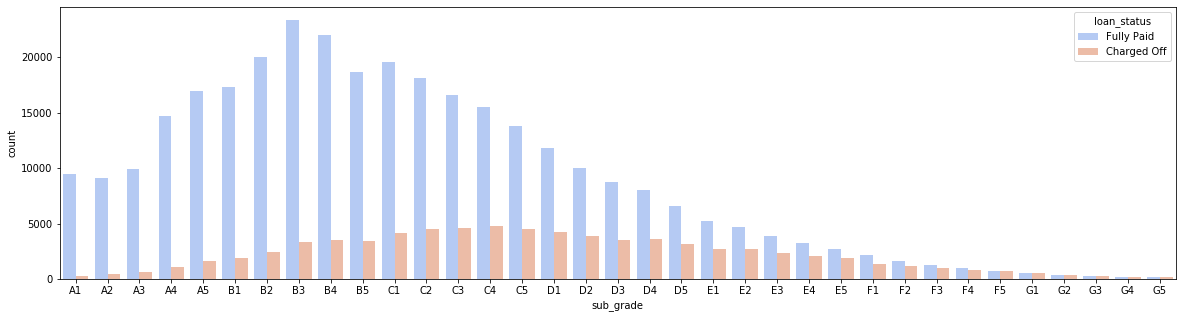

In [35]:
plt.figure(figsize = (20, 5))
order_sub_grade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=order_sub_grade, hue='loan_status')

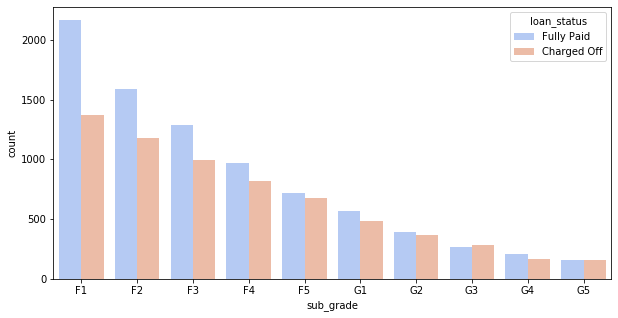

In [36]:
f_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sort_f_g = sorted(f_g['sub_grade'].unique())

plt.figure(figsize=(10, 5))
sns.countplot(x='sub_grade', data=f_g, palette='coolwarm', order=sort_f_g, hue='loan_status')

## Data Preprocessing

In [37]:
missing_values = df.isna().sum()

In [38]:
missing_values = (missing_values * 100) / df.shape[0]

In [39]:
missing_values.sort_values(ascending=False)

emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
address                 0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

In [40]:
df['emp_title'].nunique()

173105

In [41]:
df['emp_title'].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
Project Resource Teacher        1
SERESC                          1
Data Marketing Manager          1
Community Access Services       1
Jaloudi & Associates, LLC       1
Name: emp_title, Length: 173105, dtype: int64

In [42]:
df = df.drop('emp_title', axis=1)

In [44]:
df.shape

(396030, 26)

In [45]:
missing_values = df.isna().sum()

In [46]:
missing_values = (missing_values * 100)/df.shape[0]

In [48]:
missing_values.sort_values(ascending=False)

emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
address                 0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

In [50]:
df['title'].nunique()

48817

In [52]:
df['title'].value_counts()

Debt consolidation             152472
Credit card refinancing         51487
Home improvement                15264
Other                           12930
Debt Consolidation              11608
                                ...  
House Upgrades, Consolidate         1
dental round one                    1
Get me out of debt                  1
Credit Card Debt Relief             1
Free from debts                     1
Name: title, Length: 48817, dtype: int64

In [53]:
df = df.drop('title', axis=1)

In [54]:
df.shape

(396030, 25)

In [56]:
missing_values = df.isna().sum()
missing_values = (missing_values * 100) / df.shape[0]
missing_values.sort_values(ascending=False)

emp_length              4.621115
pub_rec_bankruptcies    0.135091
revol_util              0.069692
address                 0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

In [57]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [58]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

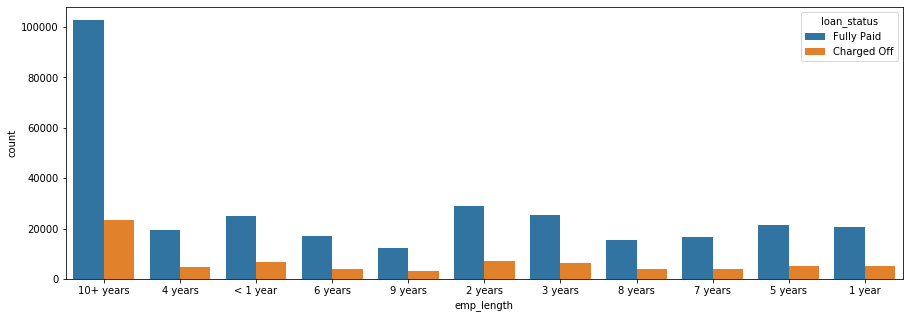

In [61]:
plt.figure(figsize=(15, 5))
sns.countplot(x='emp_length', data=df, hue='loan_status')

### CHALLENGE TASK: 

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a bar plot. This may be tricky, refer to solutions if you get stuck on creating this Series.

In [63]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [66]:
df_co = df[(df['loan_status'] == 'Charged Off' )].groupby('emp_length').count()['loan_status']

In [67]:
df_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [68]:
df_fp = df[(df['loan_status'] == 'Fully Paid' )].groupby('emp_length').count()['loan_status']

In [69]:
df_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [70]:
emp_co_fp = df_co/df_fp

In [71]:
emp_co_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [72]:
order_emp_length=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 
                  '8 years', '9 years', '10+ years']

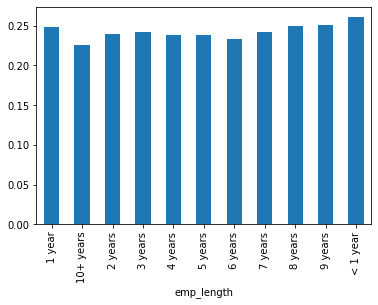

In [73]:
emp_co_fp.plot(kind='bar')

In [74]:
df = df.drop('emp_length', axis=1)

In [75]:
df.shape

(396030, 24)

In [77]:
df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
address                   0
loan_status               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
loan_amnt                 0
dtype: int64

### Purpose 

In [80]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

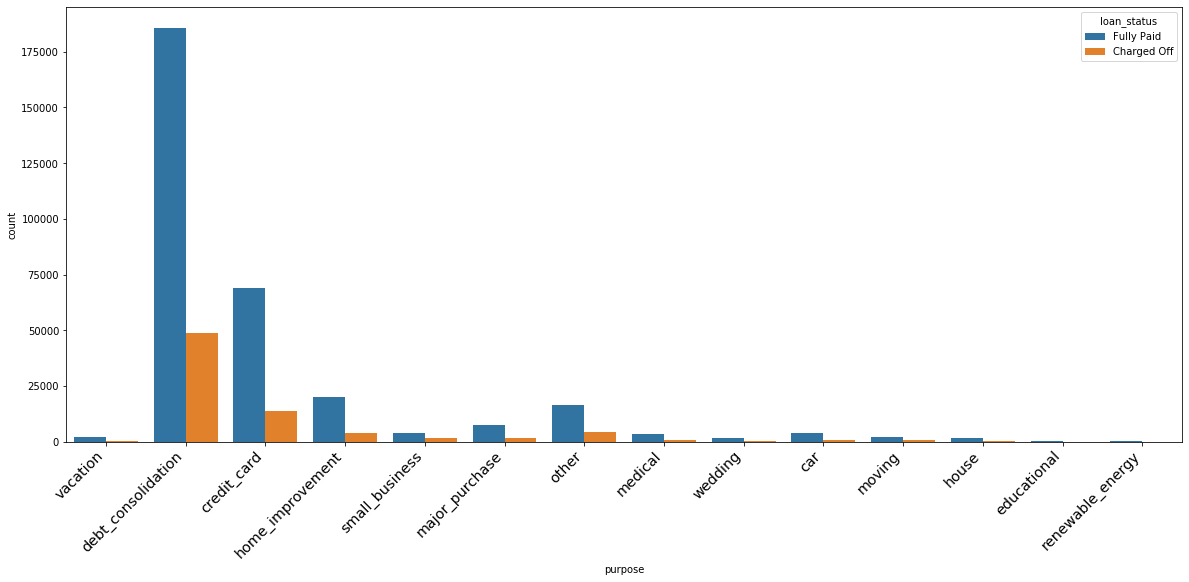

In [89]:
plt.figure(figsize = (20, 8))
chart = sns.countplot(x='purpose', data=df, hue='loan_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='x-large');

In [90]:
df_purpose_co = df[(df['loan_status'] == 'Charged Off')].groupby('purpose').count()['loan_status']

In [92]:
df_purpose_co.sort_values(ascending=False)

purpose
debt_consolidation    48640
credit_card           13874
other                  4495
home_improvement       4087
small_business         1679
major_purchase         1448
medical                 911
moving                  670
car                     633
vacation                464
house                   434
wedding                 219
renewable_energy         77
educational              42
Name: loan_status, dtype: int64

In [94]:
df_purpose_fp = df[(df['loan_status'] == 'Fully Paid')].groupby('purpose').count()['loan_status']

In [96]:
df_purpose_fp.sort_values(ascending=False)

purpose
debt_consolidation    185867
credit_card            69145
home_improvement       19943
other                  16690
major_purchase          7342
car                     4064
small_business          4022
medical                 3285
moving                  2184
vacation                1988
house                   1767
wedding                 1593
renewable_energy         252
educational              215
Name: loan_status, dtype: int64

In [97]:
df_purpose_ratio = df_purpose_co / df_purpose_fp

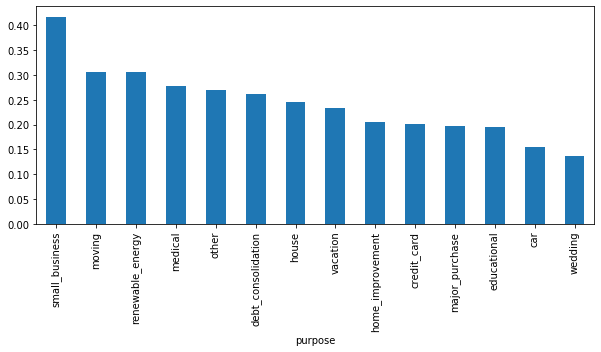

In [101]:
plt.figure(figsize = (10, 4))
df_purpose_ratio.sort_values(ascending=False).plot(kind='bar')

In [104]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [105]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [107]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()

In [110]:
df['term_encoded'] = le.fit_transform(df['term'])

In [113]:
df[['term', 'term_encoded']].head()

,term,term_encoded
0,36 months,0
1,36 months,0
2,36 months,0
3,36 months,0
4,60 months,1


In [114]:
df = df.drop('term', axis=1)

In [115]:
df.shape

(396030, 24)

In [116]:
df = df.drop('grade', axis=1)
df.shape

(396030, 23)

In [118]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [119]:
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [121]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [124]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### home_ownership

In [125]:
df['home_ownership'].head()

0        RENT
1    MORTGAGE
2        RENT
3        RENT
4    MORTGAGE
Name: home_ownership, dtype: object

In [132]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

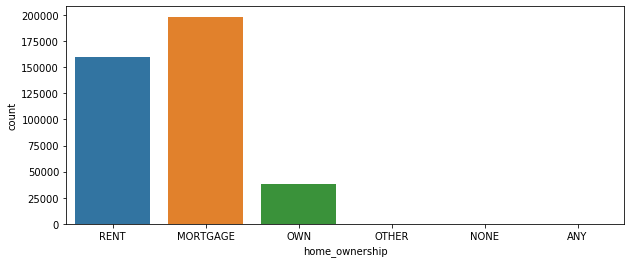

In [129]:
plt.figure(figsize = (10, 4))
sns.countplot(x='home_ownership', data=df)

In [134]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [135]:
df['home_ownership'].isna().sum()

0

In [136]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [137]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [140]:
homeownership_dummies = pd.get_dummies(df['home_ownership'])

In [142]:
df.shape

(396030, 56)

In [143]:
df = df.drop(['home_ownership'], axis=1)

In [144]:
df.shape

(396030, 55)

In [146]:
df = pd.concat([df, homeownership_dummies], axis=1)

In [147]:
df.shape

(396030, 59)

In [148]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT'],
      dtype='object')

In [149]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [150]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [153]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

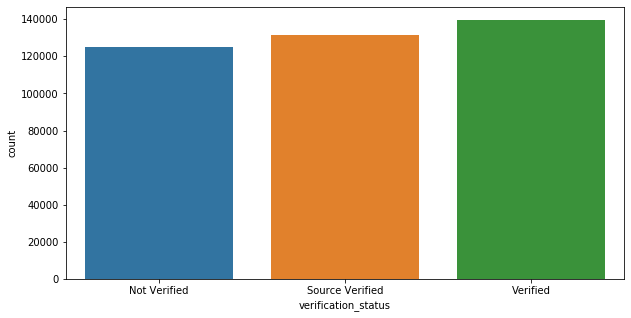

In [154]:
plt.figure(figsize = (10, 5))
sns.countplot(x='verification_status', data=df)

In [155]:
verificationstatus_dummies = pd.get_dummies(df['verification_status'])

In [156]:
verificationstatus_dummies

,Not Verified,Source Verified,Verified
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,0,1
396028,0,0,1


In [157]:
df = df.drop(['verification_status'], axis=1)

In [158]:
df.shape

(396030, 58)

In [159]:
df = pd.concat([df, verificationstatus_dummies], axis=1)

In [160]:
df.shape

(396030, 61)

In [161]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Not Verified', 'Source Verified', 'Verified'],
      dtype='object')

In [162]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [165]:
df['issue_d'].nunique()

115

In [166]:
df['issue_d'].isnull().sum()

0

In [167]:
df = df.drop(['issue_d'], axis=1)

In [168]:
df.shape

(396030, 60)

In [169]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### purpose

In [170]:
purpose_dummies = pd.get_dummies(df['purpose'])

In [171]:
purpose_dummies

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [173]:
df = df.drop(['purpose'], axis=1)

In [174]:
df = pd.concat([df, purpose_dummies], axis=1)

In [175]:
df.shape

(396030, 73)

In [176]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'Not Verified', 'Source Verified', 'Verified',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [177]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [180]:
df['earliest_cr_line'].nunique()

684

In [188]:
def extract_year(date):
    return date[-4:]

In [189]:
earliest_cr_line_year = df['earliest_cr_line'].apply(extract_year)

In [196]:
df = pd.concat([df, earliest_cr_line_year], axis=1)

In [192]:
df.shape

(396030, 74)

In [193]:
df = df.drop(['earliest_cr_line'], axis=1)

In [198]:
df.shape

(396030, 73)

In [197]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Not Verified', 'Source Verified', 'Verified', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding',
       'earliest_cr_line'],
      dtype='object')

In [199]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: object

In [201]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'initial_list_status', 'application_type', 'address',
       'earliest_cr_line'],
      dtype='object')

In [202]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [203]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [204]:
df['initial_list_status'].isnull().sum()

0

In [205]:
df['initial_list_status_encoded'] = le.fit_transform(df['initial_list_status'])

In [206]:
df[['initial_list_status', 'initial_list_status_encoded']]

,initial_list_status,initial_list_status_encoded
0,w,1
1,f,0
2,f,0
3,f,0
4,f,0
...,...,...
396025,w,1
396026,f,0
396027,f,0
396028,f,0


In [207]:
df = df.drop('initial_list_status', axis=1)

In [208]:
df.shape

(396030, 73)

In [209]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'term_encoded', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'Not Verified',
       'Source Verified', 'Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'earliest_cr_line',
       'initial_list_status_encoded'],
      dtype='object')

In [211]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'application_type', 'address', 'earliest_cr_line'], dtype='object')

In [212]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

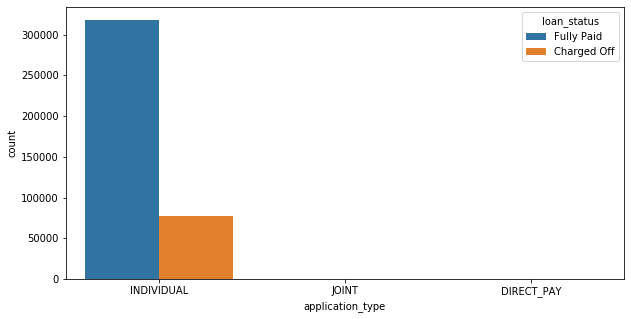

In [214]:
plt.figure(figsize=(10,5))
sns.countplot(x='application_type', data=df, hue='loan_status')

In [216]:
application_type_dummies = pd.get_dummies(df['application_type'])

In [217]:
application_type_dummies

,DIRECT_PAY,INDIVIDUAL,JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,1,0
396028,0,1,0


In [218]:
df = df.drop('application_type', axis=1)

In [219]:
df.shape

(396030, 72)

In [220]:
df = pd.concat([df, application_type_dummies], axis=1)

In [221]:
df.shape

(396030, 75)

In [222]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'term_encoded', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'Not Verified', 'Source Verified', 'Verified',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'earliest_cr_line', 'initial_list_status_encoded', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [223]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'address', 'earliest_cr_line'], dtype='object')

In [224]:
df['address'].value_counts()

USS Smith\r\nFPO AP 70466                                  8
USNS Johnson\r\nFPO AE 05113                               8
USCGC Smith\r\nFPO AE 70466                                8
USS Johnson\r\nFPO AE 48052                                8
USNS Johnson\r\nFPO AP 48052                               7
                                                          ..
0756 Wilson Island Suite 033\r\nSouth Linda, VA 05113      1
5096 Jason Oval Suite 512\r\nWest Sherrymouth, FL 93700    1
87166 Bradley Club\r\nSmithland, WV 00813                  1
39454 Brown Plains\r\nNorth Michelleport, IL 00813         1
143 Sara Courts\r\nPort Julie, AK 30723                    1
Name: address, Length: 393700, dtype: int64

In [225]:
df['address'][0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [226]:
df['address'][0][-5:]

'22690'

In [227]:
def zip_extract(add):
    return add[-5:]

In [228]:
zip_extracted = df['address'].apply(zip_extract)

In [229]:
zip_extracted

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [230]:
df = df.drop('address', axis=1)

In [231]:
df.shape

(396030, 74)

In [233]:
df = pd.concat([df, zip_extracted], axis=1)

In [234]:
df.shape

(396030, 75)

In [235]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'term_encoded', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Not Verified', 'Source Verified', 'Verified', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding',
       'earliest_cr_line', 'initial_list_status_encoded', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'address'],
      dtype='object')

In [236]:
df['address'].head

<bound method NDFrame.head of 0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object>

In [237]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [239]:
df.dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
annual_inc                     float64
loan_status                     object
                                ...   
initial_list_status_encoded      int32
DIRECT_PAY                       uint8
INDIVIDUAL                       uint8
JOINT                            uint8
address                         object
Length: 75, dtype: object

In [240]:
df.astype({'address': 'int32'}).dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
annual_inc                     float64
loan_status                     object
                                ...   
initial_list_status_encoded      int32
DIRECT_PAY                       uint8
INDIVIDUAL                       uint8
JOINT                            uint8
address                          int32
Length: 75, dtype: object

In [241]:
df.astype({'earliest_cr_line': 'int32'}).dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
annual_inc                     float64
loan_status                     object
                                ...   
initial_list_status_encoded      int32
DIRECT_PAY                       uint8
INDIVIDUAL                       uint8
JOINT                            uint8
address                         object
Length: 75, dtype: object

In [242]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [243]:
def change_to_int(data):
    return int(data)

In [244]:
df['address'] = df['address'].apply(change_to_int)

In [245]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [246]:
df['address']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: int64

In [247]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(change_to_int)

In [248]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

In [251]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [253]:
df['loan_encoded'] = le.fit_transform(df['loan_status'])

In [254]:
df[['loan_status', 'loan_encoded']]

,loan_status,loan_encoded
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [255]:
df = df.drop('loan_status', axis=1)

In [256]:
df.shape

(396030, 75)

In [302]:
df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
D1                        0
B5                        0
C1                        0
                       ... 
RENT                      0
Not Verified              0
Source Verified           0
Verified                  0
loan_amnt                 0
Length: 75, dtype: int64

In [304]:
df = df.dropna()

In [305]:
df.isnull().sum().sort_values(ascending=False)

loan_encoded       0
B2                 0
B4                 0
B5                 0
C1                 0
                  ..
RENT               0
Not Verified       0
Source Verified    0
Verified           0
loan_amnt          0
Length: 75, dtype: int64

## Sampling the data into train, test and validation

In [252]:
from sklearn.model_selection import train_test_split

In [309]:
X = df.drop('loan_encoded', axis=1).values
y = df['loan_encoded'].values

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [311]:
X_test.shape

(39522, 74)

In [312]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [313]:
X_val.shape

(35570, 74)

### Normalisation

In [271]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
scaler = MinMaxScaler()

In [315]:
X_train = scaler.fit_transform(X_train)

In [316]:
X_test = scaler.transform(X_test)

In [317]:
X_val = scaler.transform(X_val)

### Creating model

In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [318]:
model_first = Sequential()

# input layer
model_first.add(Dense(74, activation='relu'))
model_first.add(Dropout(0.2))


# hidden layers
model_first.add(Dense(37, activation='relu'))
model_first.add(Dropout(0.2))

model_first.add(Dense(19, activation='relu'))
model_first.add(Dropout(0.2))


# Output layer
model_first.add(Dense(1, activation='sigmoid'))

model_first.compile(loss='binary_crossentropy')

In [320]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [321]:
model_first.fit(x=X_train, y=y_train, batch_size=128, epochs=25, validation_data=(X_val, y_val),
               callbacks=[early_stopping])

Train on 320127 samples, validate on 35570 samples
Epoch 1/25
320127/320127 [==============================] - 13s 42us/sample - loss: 0.4052 - val_loss: 0.3661
Epoch 2/25
320127/320127 [==============================] - 12s 36us/sample - loss: 0.3728 - val_loss: 0.3632
Epoch 3/25
320127/320127 [==============================] - 12s 36us/sample - loss: 0.3491 - val_loss: 0.3144
Epoch 4/25
320127/320127 [==============================] - 12s 37us/sample - loss: 0.3149 - val_loss: 0.2954
Epoch 5/25
320127/320127 [==============================] - 11s 35us/sample - loss: 0.3059 - val_loss: 0.2914
Epoch 6/25
320127/320127 [==============================] - 11s 35us/sample - loss: 0.3039 - val_loss: 0.2908
Epoch 7/25
320127/320127 [==============================] - 11s 35us/sample - loss: 0.3038 - val_loss: 0.2902
Epoch 8/25
320127/320127 [==============================] - 11s 35us/sample - loss: 0.3038 - val_loss: 0.2906
Epoch 9/25
320127/320127 [==============================] - 11s 35us/

In [323]:
loss_df = pd.DataFrame(model_first.history.history)

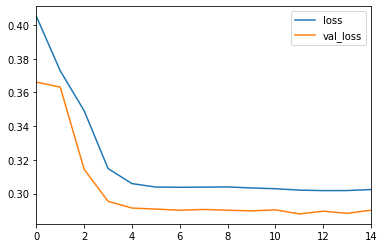

In [324]:
loss_df.plot()

In [329]:
model_second = Sequential()

# input layer
model_second.add(Dense(74, activation='relu'))
model_second.add(Dropout(0.2))


# hidden layers
model_second.add(Dense(37, activation='relu'))
model_second.add(Dropout(0.2))

model_second.add(Dense(19, activation='relu'))
model_second.add(Dropout(0.2))

model_second.add(Dense(9, activation='relu'))
model_second.add(Dropout(0.2))


# Output layer
model_second.add(Dense(1, activation='sigmoid'))

model_second.compile(loss='binary_crossentropy', optimizer='adam')

In [330]:
model_second.fit(x=X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_val, y_val),
               callbacks=[early_stopping])

Train on 320127 samples, validate on 35570 samples
Epoch 1/25
320127/320127 [==============================] - 9s 27us/sample - loss: 0.4297 - val_loss: 0.3646
Epoch 2/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.3753 - val_loss: 0.3612
Epoch 3/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.3622 - val_loss: 0.3355
Epoch 4/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.3375 - val_loss: 0.3022
Epoch 5/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.2992 - val_loss: 0.2840
Epoch 6/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.2886 - val_loss: 0.2833
Epoch 7/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.2868 - val_loss: 0.2822
Epoch 8/25
320127/320127 [==============================] - 7s 22us/sample - loss: 0.2845 - val_loss: 0.2832
Epoch 9/25
320127/320127 [==============================] - 7s 22us/sample - 

In [331]:
loss_second_df = pd.DataFrame(model_second.history.history)

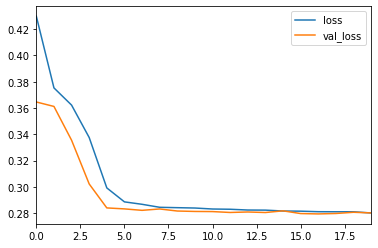

In [332]:
loss_second_df.plot()

### Evaluate

In [335]:
from sklearn.metrics import classification_report,confusion_matrix

### model_first

In [334]:
predictions_first = model_first.predict_classes(X_test)

In [336]:
print(classification_report(y_true=y_test, y_pred=predictions_first))

              precision    recall  f1-score   support

           0       0.97      0.43      0.60      7716
           1       0.88      1.00      0.93     31806

    accuracy                           0.89     39522
   macro avg       0.93      0.71      0.76     39522
weighted avg       0.90      0.89      0.87     39522



In [337]:
print(confusion_matrix(y_true=y_test, y_pred=predictions_first))

[[ 3310  4406]
 [   85 31721]]


###  model_second

In [338]:
predictions_second = model_second.predict_classes(X_test)

In [339]:
print(classification_report(y_true=y_test, y_pred=predictions_second))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      7716
           1       0.88      1.00      0.94     31806

    accuracy                           0.89     39522
   macro avg       0.94      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



In [340]:
print(confusion_matrix(y_true=y_test, y_pred=predictions_second))

[[ 3346  4370]
 [   21 31785]]
